# Introduction

The Indian Railways is one of the largest railway networks in the world, transporting millions of passengers daily. With the increasing demand for rail travel, the ticket confirmation process has become a critical aspect of travel planning.This confirmation is based on various factors, including the Passenger Name Record (PNR) number, train number, date of journey, class of travel, and the availability of seats. Additional elements like quota, source and destination stations, booking date, travel distance, and current status of the booking also play a significant role. The process is dynamic, influenced by the number of passengers, their ages, the booking channel, and even seasonal considerations such as holidays or peak seasons, all of which can affect the waitlist position and final confirmation status.


# Importing all the necessary library

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


# Data reading and understanding

In [4]:

df=pd.read_csv(r"Railway Ticket Confirmation.csv")


In [5]:
df.describe()

,Train Number,Number of Passengers,Travel Distance,Number of Stations,Travel Time,Seat Availability
count,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000
mean,55039.057000,3.006033,1022.616300,10.47540,24.589933,248.493767
std,26073.496614,1.414472,561.967777,5.20616,13.279498,144.248284
min,10000.000000,1.000000,50.000000,2.00000,2.000000,0.000000
25%,32361.750000,2.000000,536.000000,6.00000,13.000000,124.000000
50%,55279.500000,3.000000,1023.000000,10.00000,25.000000,248.000000
75%,77699.750000,4.000000,1509.000000,15.00000,36.000000,373.000000
max,99997.000000,5.000000,1999.000000,19.00000,47.000000,499.000000


In [5]:
df

,PNR Number,Train Number,Date of Journey,Class of Travel,Quota,Source Station,Destination Station,Booking Date,Current Status,Number of Passengers,...,Booking Channel,Travel Distance,Number of Stations,Travel Time,Train Type,Seat Availability,Special Considerations,Holiday or Peak Season,Waitlist Position,Confirmation Status
0,PNR0000000000,51450,01-09-2024,3AC,General,NDLS,CSMT,01-01-2024,Confirmed,4,...,Counter,1656,17,37,Shatabdi,159,Senior Citizen,Yes,NaN,Confirmed
1,PNR0000000001,54807,02-09-2024,3AC,Premium Tatkal,MMCT,LTT,02-01-2024,Waitlisted,5,...,Mobile App,1932,18,6,Shatabdi,309,NaN,Yes,WL097,Not Confirmed
2,PNR0000000002,14396,03-09-2024,3AC,Ladies,GKP,BBS,03-01-2024,RAC,5,...,IRCTC Website,155,4,17,Express,143,NaN,Yes,NaN,Confirmed
3,PNR0000000003,20295,04-09-2024,3AC,Ladies,ASR,KOAA,04-01-2024,Waitlisted,1,...,Counter,1840,5,16,Superfast,256,Senior Citizen,No,WL011,Not Confirmed
4,PNR0000000004,48598,05-09-2024,2AC,Tatkal,MAS,SBC,05-01-2024,Confirmed,3,...,Mobile App,1766,9,32,Express,58,NaN,Yes,NaN,Confirmed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,PNR0000029995,38801,17-10-2106,3AC,Tatkal,BCT,CSMT,15-02-2106,Confirmed,5,...,Mobile App,1451,2,9,Rajdhani,409,NaN,No,NaN,Confirmed
29996,PNR0000029996,99609,18-10-2106,1AC,General,MMCT,NJP,16-02-2106,RAC,4,...,Mobile App,1581,16,3,Shatabdi,90,Senior Citizen,No,NaN,Confirmed
29997,PNR0000029997,46802,19-10-2106,Sleeper,General,JP,MAS,17-02-2106,Waitlisted,3,...,IRCTC Website,963,15,12,Shatabdi,110,NaN,Yes,WL097,Not Confirmed
29998,PNR0000029998,94878,20-10-2106,Sleeper,General,BSB,CNB,18-02-2106,Waitlisted,4,...,Counter,830,8,7,Express,91,NaN,No,WL006,Not Confirmed


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   PNR Number              30000 non-null  object
 1   Train Number            30000 non-null  int64 
 2   Date of Journey         30000 non-null  object
 3   Class of Travel         30000 non-null  object
 4   Quota                   30000 non-null  object
 5   Source Station          30000 non-null  object
 6   Destination Station     30000 non-null  object
 7   Booking Date            30000 non-null  object
 8   Current Status          30000 non-null  object
 9   Number of Passengers    30000 non-null  int64 
 10  Age of Passengers       30000 non-null  object
 11  Booking Channel         30000 non-null  object
 12  Travel Distance         30000 non-null  int64 
 13  Number of Stations      30000 non-null  int64 
 14  Travel Time             30000 non-null  int64 
 15  Tr

# Checking null values

In [7]:
df.isnull().sum()

PNR Number                    0
Train Number                  0
Date of Journey               0
Class of Travel               0
Quota                         0
Source Station                0
Destination Station           0
Booking Date                  0
Current Status                0
Number of Passengers          0
Age of Passengers             0
Booking Channel               0
Travel Distance               0
Number of Stations            0
Travel Time                   0
Train Type                    0
Seat Availability             0
Special Considerations     9955
Holiday or Peak Season        0
Waitlist Position         19947
Confirmation Status           0
dtype: int64

In [8]:
df.dropna(inplace=True)


In [9]:
df['Special Considerations'].interpolate(method='lenear',inplace=True)
df['Waitlist Position'].interpolate(method='lenear',inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_18624\835352430.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Special Considerations'].interpolate(method='lenear',inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_18624\835352430.py:1: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df['Special Considerations'].interpolate(method='lenear',inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_18

In [10]:
for i in df:
    j=i.replace(' ','_')
    df=df.rename(columns={i:j.capitalize()})

In [11]:
print(df.to_string())

          Pnr_number  Train_number Date_of_journey Class_of_travel           Quota Source_station Destination_station Booking_date Current_status  Number_of_passengers Age_of_passengers Booking_channel  Travel_distance  Number_of_stations  Travel_time Train_type  Seat_availability Special_considerations Holiday_or_peak_season Waitlist_position Confirmation_status
3      PNR0000000003         20295      04-09-2024             3AC          Ladies            ASR                KOAA   04-01-2024     Waitlisted                     1    Senior Citizen         Counter             1840                   5           16  Superfast                256         Senior Citizen                     No             WL011       Not Confirmed
10     PNR0000000010         84954      11-09-2024             1AC          Tatkal            CNB                 MAS   11-01-2024     Waitlisted                     4             Child         Counter             1830                  11           46    Express      

In [12]:
print(df.columns)

Index(['Pnr_number', 'Train_number', 'Date_of_journey', 'Class_of_travel',
       'Quota', 'Source_station', 'Destination_station', 'Booking_date',
       'Current_status', 'Number_of_passengers', 'Age_of_passengers',
       'Booking_channel', 'Travel_distance', 'Number_of_stations',
       'Travel_time', 'Train_type', 'Seat_availability',
       'Special_considerations', 'Holiday_or_peak_season', 'Waitlist_position',
       'Confirmation_status'],
      dtype='object')


In [13]:
df.isnull().sum()

Pnr_number                0
Train_number              0
Date_of_journey           0
Class_of_travel           0
Quota                     0
Source_station            0
Destination_station       0
Booking_date              0
Current_status            0
Number_of_passengers      0
Age_of_passengers         0
Booking_channel           0
Travel_distance           0
Number_of_stations        0
Travel_time               0
Train_type                0
Seat_availability         0
Special_considerations    0
Holiday_or_peak_season    0
Waitlist_position         0
Confirmation_status       0
dtype: int64

In [14]:
df['Date_of_journey']=pd.to_datetime(df['Date_of_journey'],format='%d-%m-%Y')

In [15]:
df

,Pnr_number,Train_number,Date_of_journey,Class_of_travel,Quota,Source_station,Destination_station,Booking_date,Current_status,Number_of_passengers,...,Booking_channel,Travel_distance,Number_of_stations,Travel_time,Train_type,Seat_availability,Special_considerations,Holiday_or_peak_season,Waitlist_position,Confirmation_status
3,PNR0000000003,20295,2024-09-04,3AC,Ladies,ASR,KOAA,04-01-2024,Waitlisted,1,...,Counter,1840,5,16,Superfast,256,Senior Citizen,No,WL011,Not Confirmed
10,PNR0000000010,84954,2024-09-11,1AC,Tatkal,CNB,MAS,11-01-2024,Waitlisted,4,...,Counter,1830,11,46,Express,116,Defense Quota,Yes,WL065,Not Confirmed
17,PNR0000000017,17913,2024-09-18,2AC,Ladies,JHS,JP,18-01-2024,Waitlisted,3,...,Mobile App,1038,3,47,Shatabdi,162,Defense Quota,No,WL026,Not Confirmed
18,PNR0000000018,15855,2024-09-19,3AC,General,JHS,HWH,19-01-2024,Waitlisted,3,...,Mobile App,639,17,24,Rajdhani,162,Senior Citizen,No,WL086,Not Confirmed
19,PNR0000000019,87466,2024-09-20,Sleeper,Ladies,BBS,ASR,20-01-2024,Waitlisted,5,...,Counter,376,17,14,Express,33,Defense Quota,Yes,WL127,Not Confirmed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29978,PNR0000029978,57722,2106-09-30,2AC,Ladies,JP,GKP,29-01-2106,Waitlisted,5,...,IRCTC Website,1663,2,8,Superfast,48,Senior Citizen,No,WL038,Not Confirmed
29979,PNR0000029979,67886,2106-10-01,3AC,Premium Tatkal,ASR,HWH,30-01-2106,Waitlisted,2,...,Mobile App,476,18,7,Shatabdi,332,Defense Quota,Yes,WL028,Not Confirmed
29982,PNR0000029982,10085,2106-10-04,1AC,Tatkal,LTT,NDLS,02-02-2106,Waitlisted,1,...,IRCTC Website,1615,17,16,Express,247,Defense Quota,No,WL078,Not Confirmed
29987,PNR0000029987,82865,2106-10-09,Sleeper,General,SC,GKP,07-02-2106,Waitlisted,2,...,Counter,1740,17,14,Shatabdi,82,Defense Quota,No,WL116,Not Confirmed


In [16]:
df['Booking_date']=pd.to_datetime(df['Booking_date'],format='%d-%m-%Y')

In [17]:
df

,Pnr_number,Train_number,Date_of_journey,Class_of_travel,Quota,Source_station,Destination_station,Booking_date,Current_status,Number_of_passengers,...,Booking_channel,Travel_distance,Number_of_stations,Travel_time,Train_type,Seat_availability,Special_considerations,Holiday_or_peak_season,Waitlist_position,Confirmation_status
3,PNR0000000003,20295,2024-09-04,3AC,Ladies,ASR,KOAA,2024-01-04,Waitlisted,1,...,Counter,1840,5,16,Superfast,256,Senior Citizen,No,WL011,Not Confirmed
10,PNR0000000010,84954,2024-09-11,1AC,Tatkal,CNB,MAS,2024-01-11,Waitlisted,4,...,Counter,1830,11,46,Express,116,Defense Quota,Yes,WL065,Not Confirmed
17,PNR0000000017,17913,2024-09-18,2AC,Ladies,JHS,JP,2024-01-18,Waitlisted,3,...,Mobile App,1038,3,47,Shatabdi,162,Defense Quota,No,WL026,Not Confirmed
18,PNR0000000018,15855,2024-09-19,3AC,General,JHS,HWH,2024-01-19,Waitlisted,3,...,Mobile App,639,17,24,Rajdhani,162,Senior Citizen,No,WL086,Not Confirmed
19,PNR0000000019,87466,2024-09-20,Sleeper,Ladies,BBS,ASR,2024-01-20,Waitlisted,5,...,Counter,376,17,14,Express,33,Defense Quota,Yes,WL127,Not Confirmed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29978,PNR0000029978,57722,2106-09-30,2AC,Ladies,JP,GKP,2106-01-29,Waitlisted,5,...,IRCTC Website,1663,2,8,Superfast,48,Senior Citizen,No,WL038,Not Confirmed
29979,PNR0000029979,67886,2106-10-01,3AC,Premium Tatkal,ASR,HWH,2106-01-30,Waitlisted,2,...,Mobile App,476,18,7,Shatabdi,332,Defense Quota,Yes,WL028,Not Confirmed
29982,PNR0000029982,10085,2106-10-04,1AC,Tatkal,LTT,NDLS,2106-02-02,Waitlisted,1,...,IRCTC Website,1615,17,16,Express,247,Defense Quota,No,WL078,Not Confirmed
29987,PNR0000029987,82865,2106-10-09,Sleeper,General,SC,GKP,2106-02-07,Waitlisted,2,...,Counter,1740,17,14,Shatabdi,82,Defense Quota,No,WL116,Not Confirmed


### 1. Identify  the average travel distance

In [18]:
df['Travel_distance'].mean()

np.float64(1024.4292719167904)

 ### 2. identify the average travel time

In [19]:
df['Travel_time'].mean()

np.float64(24.483060921248143)

### 1. Identify the top 5 train type with the highest number of bookings 

In [20]:
df['Train_type'].value_counts().nlargest(5) 

Train_type
Rajdhani     1770
Shatabdi     1687
Superfast    1661
Express      1612
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_18624\1322112736.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Train_type', y='Travel_time',data=df,palette='husl')


<Axes: xlabel='Train_type', ylabel='Travel_time'>

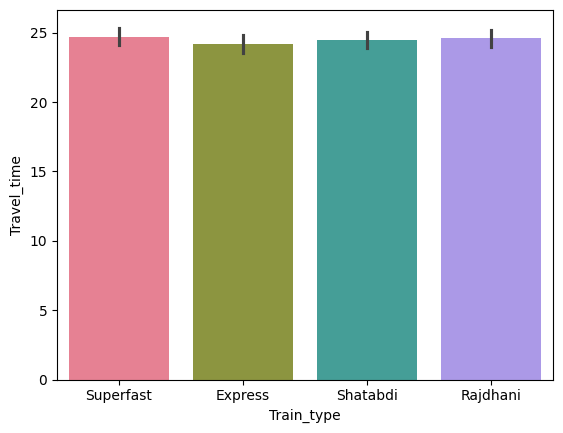

In [21]:
sns.barplot(x='Train_type', y='Travel_time',data=df,palette='husl')

The data clearly illustrates that, the Superfast train has the longest travel time, followed by the Express, Shatabdi, and Rajdhani trains, respectively

 ### 2.calculate average travel time by train type

In [22]:
df.groupby('Train_type')['Travel_time'].mean()

Train_type
Express      24.192308
Rajdhani     24.583051
Shatabdi     24.449318
Superfast    24.692956
Name: Travel_time, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_18624\3231336125.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Train_type', y='Travel_time',data=df,palette='husl')


<Axes: xlabel='Train_type', ylabel='Travel_time'>

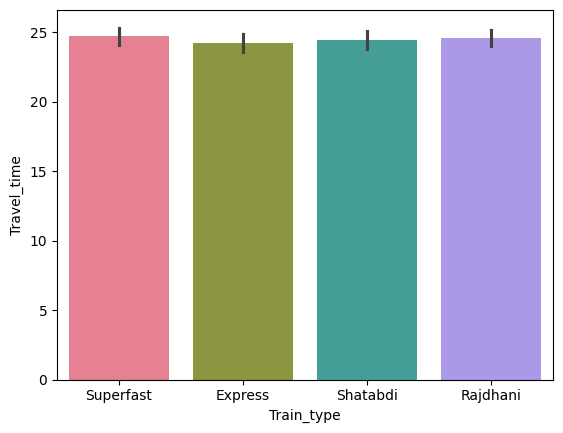

In [23]:
df.groupby('Train_type')['Travel_time'].mean()
sns.barplot(x='Train_type', y='Travel_time',data=df,palette='husl')

Based on the bar graph data, all four train types exhibit similar travel times, with Superfast being the fastest and Rajdhani being the slowest.

 ### 3. plot train types distribution 

<Axes: xlabel='Train_type'>

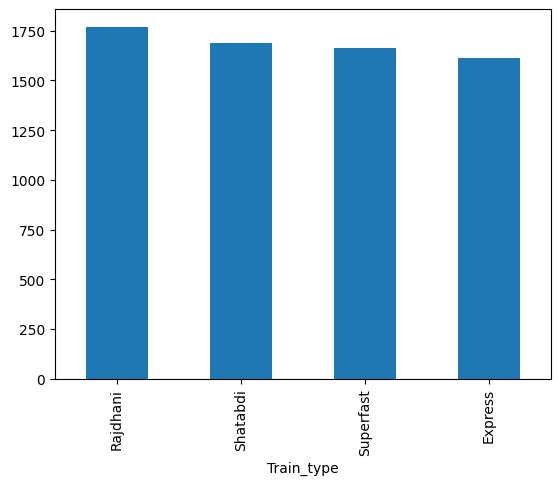

In [24]:
df['Train_type'].value_counts().plot(kind='bar')

The graph illustrates the average speeds of different types of trains in India. Rajdhani trains are the fastest, followed by Shatabdi, Superfast, and Express trains.

  ### 4.  Identify the count of bookings made by source station 

In [25]:
df_2=df.groupby(['Source_station'],as_index=False)['Source_station'].agg(['count'])
df_2

,Source_station,count
0,ADI,298
1,ASR,274
2,BBS,312
3,BCT,301
4,BSB,278
5,CNB,320
6,CSMT,281
7,GKP,299
8,HWH,283
9,JHS,278


C:\Users\user\AppData\Local\Temp\ipykernel_18624\797223664.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Source_station',y='count',data=df_2,palette='husl')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'ADI'),
  Text(1, 0, 'ASR'),
  Text(2, 0, 'BBS'),
  Text(3, 0, 'BCT'),
  Text(4, 0, 'BSB'),
  Text(5, 0, 'CNB'),
  Text(6, 0, 'CSMT'),
  Text(7, 0, 'GKP'),
  Text(8, 0, 'HWH'),
  Text(9, 0, 'JHS'),
  Text(10, 0, 'JP'),
  Text(11, 0, 'JU'),
  Text(12, 0, 'KOAA'),
  Text(13, 0, 'LKO'),
  Text(14, 0, 'LTT'),
  Text(15, 0, 'MAS'),
  Text(16, 0, 'MMCT'),
  Text(17, 0, 'NDLS'),
  Text(18, 0, 'NJP'),
  Text(19, 0, 'PNBE'),
  Text(20, 0, 'SBC'),
  Text(21, 0, 'SC'),
  Text(22, 0, 'UMB')])

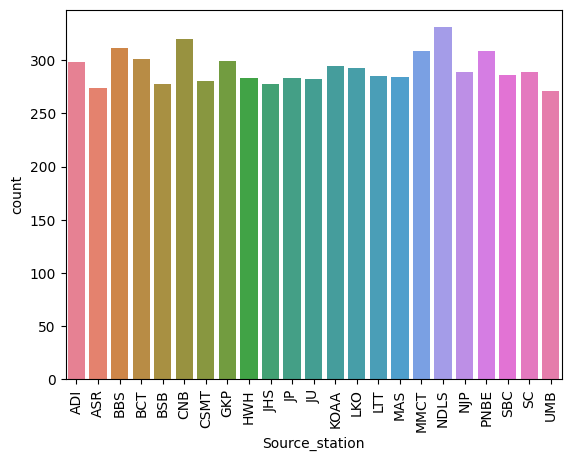

In [26]:

sns.barplot(x='Source_station',y='count',data=df_2,palette='husl')
plt.xticks(rotation=90)


The bar chart illustrates the distribution of data points across various source stations.While there's variation in the count for each station,most fall within the range of 200 to 300, while UMB has the lowest and NDLS has the highest source stations

 ### 5. Identify  the average travel distance

In [ ]:
df['Travel_distance'].mean()

### 6.what is the most common class of travel 

In [29]:
df_3=df.groupby(['Class_of_travel'],as_index=False).agg(count=('Class_of_travel','count')).sort_values(by="count",ascending=False)
df_3

,Class_of_travel,count
3,Sleeper,1733
0,1AC,1694
1,2AC,1655
2,3AC,1648


C:\Users\user\AppData\Local\Temp\ipykernel_18624\708485064.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class_of_travel',y='count',data=df_3,palette='husl')


([0, 1, 2, 3],
 [Text(0, 0, 'Sleeper'),
  Text(1, 0, '1AC'),
  Text(2, 0, '2AC'),
  Text(3, 0, '3AC')])

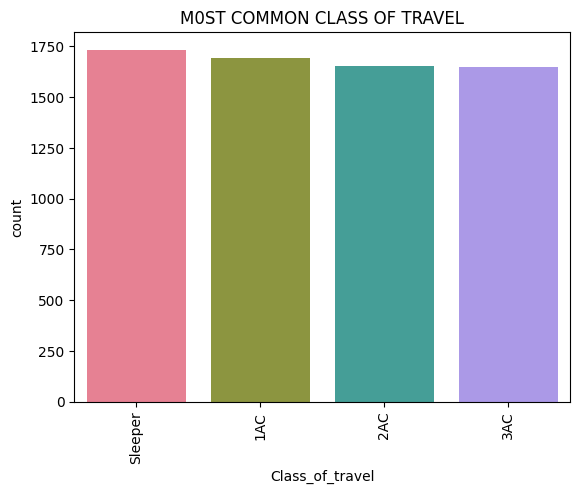

In [30]:
sns.barplot(x='Class_of_travel',y='count',data=df_3,palette='husl')
plt.title('M0ST COMMON CLASS OF TRAVEL')
plt.xticks(rotation=90)


The data clearly illustrates that the Sleeper class is the most popular choice among travelers

 ### 7. Display bookings for trains traveling over 500 km 

In [31]:
df_4=df.groupby(['Travel_distance'],as_index=False).agg(count=('Travel_distance','count')).sort_values(by="Travel_distance",ascending=False).head(10)
df_4 

,Travel_distance,count
1883,1999,6
1882,1998,4
1881,1997,3
1880,1996,2
1879,1994,4
1878,1993,5
1877,1992,3
1876,1991,4
1875,1990,1
1874,1989,3


C:\Users\user\AppData\Local\Temp\ipykernel_18624\970159844.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Travel_distance',y='count',data=df_4,palette='husl')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '1989'),
  Text(1, 0, '1990'),
  Text(2, 0, '1991'),
  Text(3, 0, '1992'),
  Text(4, 0, '1993'),
  Text(5, 0, '1994'),
  Text(6, 0, '1996'),
  Text(7, 0, '1997'),
  Text(8, 0, '1998'),
  Text(9, 0, '1999')])

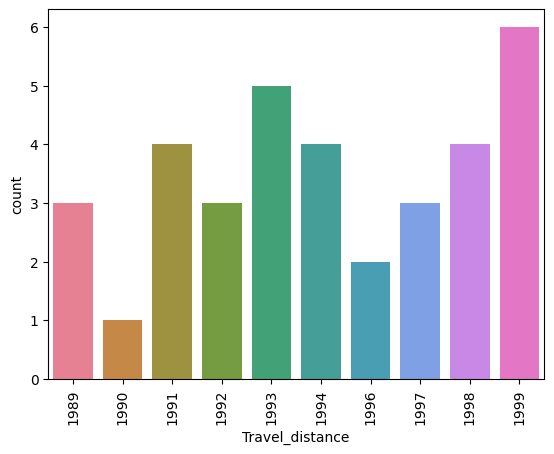

In [32]:
sns.barplot(x='Travel_distance',y='count',data=df_4,palette='husl')
plt.xticks(rotation=90)

In this graph The highest travel distance was recorded in 1999, followed closely by 1993. Conversely, 1990 saw the least travel distance.

### 8.  what is the sum number of passengers by quota

In [33]:
df_5=df.groupby(['Quota'],as_index=False).agg(count=('Number_of_passengers','count')).sort_values(by="count",ascending=False)
df_5

,Quota,count
1,Ladies,1692
0,General,1688
3,Tatkal,1688
2,Premium Tatkal,1662


            Quota  Number_of_passengers
1          Ladies                  1692
0         General                  1688
3          Tatkal                  1688
2  Premium Tatkal                  1662


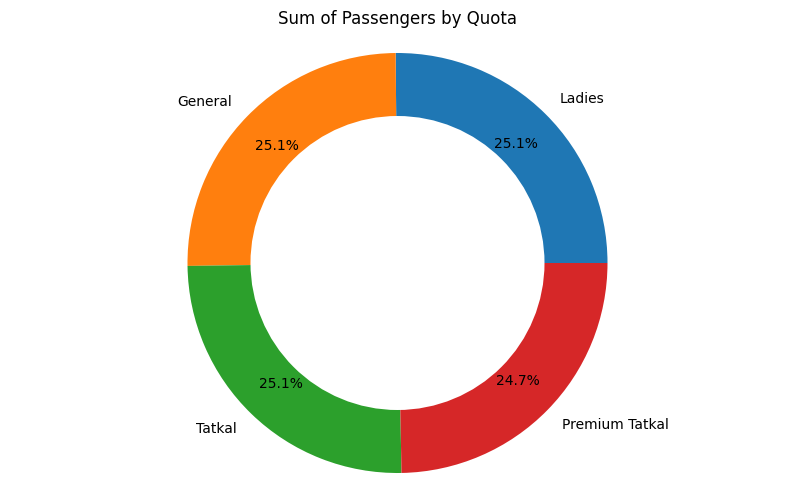

In [34]:
quota_counts = df.groupby("Quota", as_index=False).agg({"Number_of_passengers": "count"}).sort_values(by="Number_of_passengers", ascending=False)
print(quota_counts)
plt.figure(figsize=(10, 6))
plt.pie(quota_counts["Number_of_passengers"], labels=quota_counts["Quota"], autopct='%1.1f%%', pctdistance=0.8)
plt.title('Sum of Passengers by Quota')
plt.axis('equal')  
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

The graph  illustrates a near-equal distribution of passengers across different quota categories

### 9. identify the average travel time

In [43]:
df['Travel_time'].mean()

np.float64(24.483060921248143)

### 10. Which class of travel has the most passengers

Class of travel with the most passengers: Sleeper


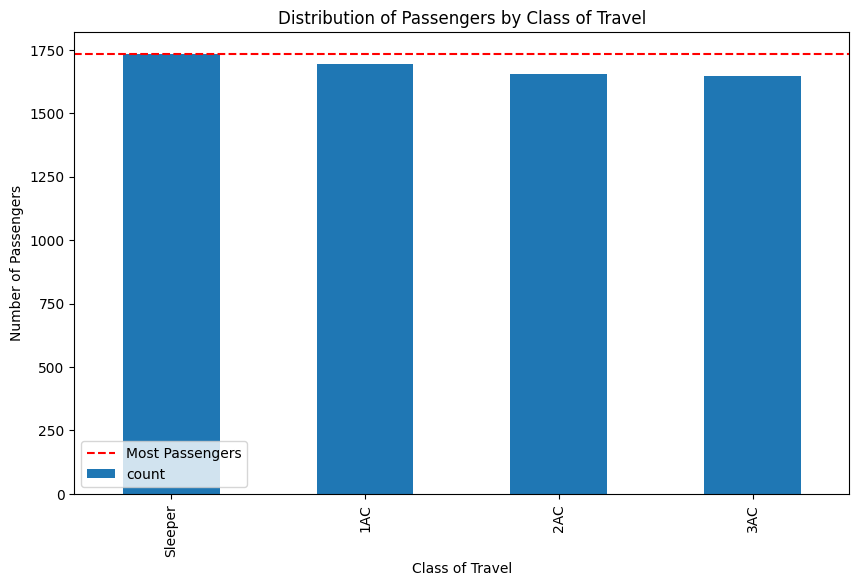

In [35]:
most_passengers_class = df['Class_of_travel'].value_counts().idxmax()
print("Class of travel with the most passengers:", most_passengers_class)
plt.figure(figsize=(10, 6))
df['Class_of_travel'].value_counts().plot(kind='bar')
plt.title('Distribution of Passengers by Class of Travel')
plt.xlabel('Class of Travel')
plt.ylabel('Number of Passengers')
plt.axhline(y=df[df['Class_of_travel'] == most_passengers_class].shape[0], color='r', linestyle='--', label='Most Passengers')
plt.legend()
plt.xticks(rotation=90)
plt.show()

The bar chart illustrates the distribution of passengers across different classes of travel on a train. The most popular class is Sleeper, with nearly 1750 passengers.

 ### 11.How many passengers traveled alone

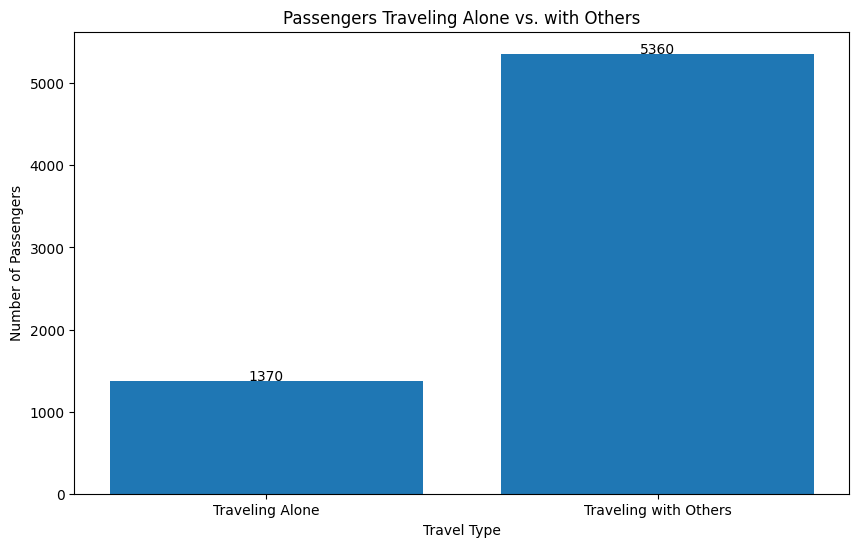

In [36]:
df[df['Number_of_passengers'] == 1].shape[0]
passengers_alone = df[df['Number_of_passengers'] == 1]

plt.figure(figsize=(10, 6))
traveling_alone = passengers_alone.shape[0]
traveling_with_others = df.shape[0] - passengers_alone.shape[0]
labels = ['Traveling Alone', 'Traveling with Others']
values = [traveling_alone, traveling_with_others]
plt.bar(labels, values)
plt.title('Passengers Traveling Alone vs. with Others')
plt.xlabel('Travel Type')
plt.ylabel('Number of Passengers')
plt.text(0, traveling_alone + 10, str(traveling_alone), ha='center')
plt.text(1, traveling_with_others + 10, str(traveling_with_others), ha='center')
plt.show()

The graph shows that 5360 passengers traveled with others, compared to 1370 passengers who traveled alone.

### 12. what is the average travel distannce for each train type

In [37]:
df.groupby('Train_type')['Travel_distance'].mean()

Train_type
Express      1047.866625
Rajdhani      997.662147
Shatabdi     1012.511559
Superfast    1042.311258
Name: Travel_distance, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_18624\3997771381.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Train_type',y='Travel_distance',data=df,palette='bright')


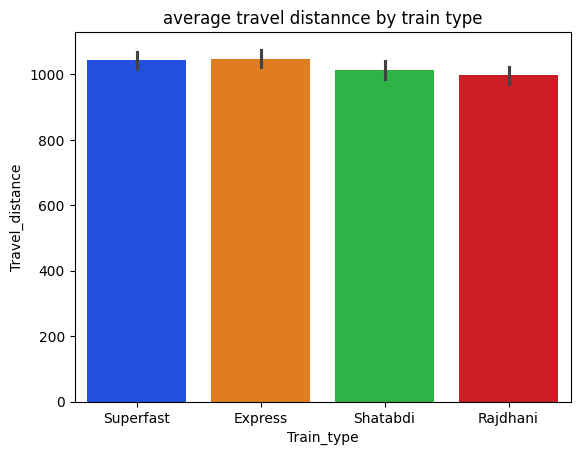

In [38]:
sns.barplot(x='Train_type',y='Travel_distance',data=df,palette='bright')
plt.title('average travel distannce by train type')
plt.show()

The graph illustrates the average travel distance for different train types. Superfast trains exhibit the highest average travel distance, exceeding 1000 km.Rajdhani trains have the shortest average travel distance, slightly below 1000 km.

### 13. Show seat availability by class of travel

C:\Users\user\AppData\Local\Temp\ipykernel_18624\2778171589.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class_of_travel',y='Seat_availability',data=df,palette='bright')


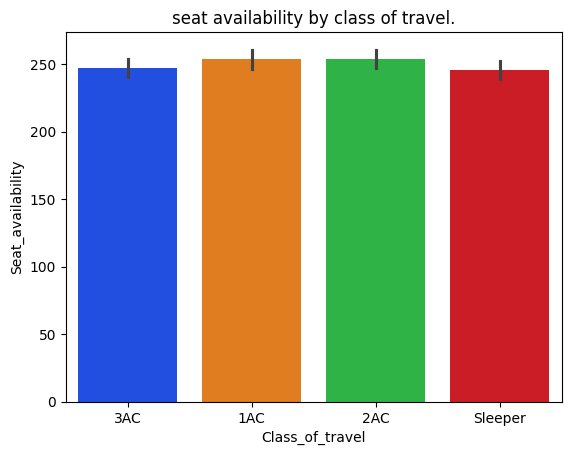

In [39]:
df_6=df.groupby(['Class_of_travel'],as_index=False).agg(count=('Seat_availability','count')).sort_values(by="count",ascending=False)
df_6

sns.barplot(x='Class_of_travel',y='Seat_availability',data=df,palette='bright')
plt.title('seat availability by class of travel.')
plt.show()

This graph shows that seat availability across different travel classes, it's evident that all classes have nearly equal seat availability, around 250 seats each

### 14. Find the top 3 booking channels

In [40]:
df_6=df.groupby(['Booking_channel'])['Booking_channel'].agg(['count'])
Top_3_Booking_Channels=df_6.sort_values(by='count',ascending=False).head(3)
print(Top_3_Booking_Channels)

                 count
Booking_channel       
IRCTC Website     2259
Counter           2252
Mobile App        2219


<function matplotlib.pyplot.show(close=None, block=None)>

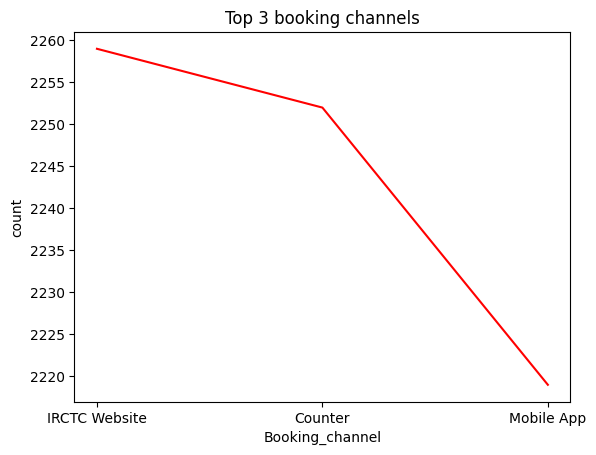

In [41]:
import seaborn as sns 
sns.lineplot(x='Booking_channel',y='count',data=Top_3_Booking_Channels,color='red')
plt.title('Top 3 booking channels')
plt.show

It's clear that the IRCTC website is the most popular booking channel among the top 3, followed by the counter and then the mobile app.

### 15.  Identify the Bar chart for destination station vs. travel distance.

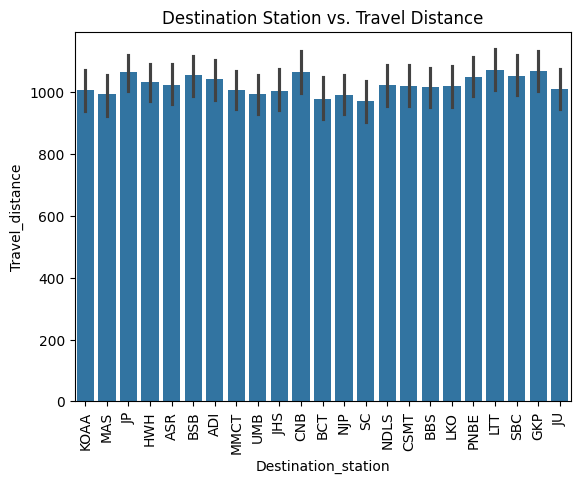

In [42]:
import seaborn as sns
sns.barplot(x='Destination_station', y='Travel_distance', data=df)
plt.title('Destination Station vs. Travel Distance')
plt.xticks(rotation=90)
plt.show()


This bar chart illustrates the travel distances to various destination stations. The data reveals a wide range of distances, with the shortest journey being around 200 kilometers and the longest exceeding 1000 kilometers.

  #  Conclution

In conclution ,The provided index reveals a comprehensive dataset encompassing 20 features related to Indian Railways train bookings. This extensive collection of information offers a unique opportunity for data-driven analysis, enabling stakeholders to optimize railway operations, enhance passenger experience, and inform policy decisions.The Indian Railways dataset presents a valuable opportunity for data-driven insights, enabling stakeholders to enhance passenger experience, optimize operations, and inform policy decisions. By leveraging this comprehensive dataset, Indian Railways can transform its services, fostering a more efficient, customer-centric, and sustainable transportation system.Overall, this dataset offers a rich source of information for insights and improvements in the Indian Railways booking system